Analysing potential factors that contribute to access to healthy food in 2015.

In [23]:
## Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [24]:
# Import the Excel files and read the tabs we need into dataframes.

#Food Environment Atlas -  DataDownload
xls1 = pd.ExcelFile('DataDownload.xls')

#Access df 
df1 = pd.read_excel(xls1, 'ACCESS')
df1 = df1[["FIPS", "State", "County","LACCESS_POP15","PCT_LACCESS_POP15"]]
df1= df1.rename(columns = {'LACCESS_POP15':'Population with low access',
                           'PCT_LACCESS_POP15':'Percent of population with low access'})

#Income df
df2 = pd.read_excel(xls1,'SOCIOECONOMIC')
df2 = df2[["FIPS", "State", "County","MEDHHINC15"]]
df2 = df2.rename(columns = {"MEDHHINC15" : "Median Household Income 2015"})

#County Level Data - Education
xls2 = pd.ExcelFile('Education.xls')

#Education df
df3 = pd.read_excel(xls2,skiprows=4)

#Trim Education df to include only the columns we need, *2013-17*

df3=df3[["FIPS Code",

      "Less than a high school diploma, 2013-17",
      "High school diploma only, 2013-17",
      "Some college or associate's degree, 2013-17",
      "Bachelor's degree or higher, 2013-17",
      "Percent of adults with less than a high school diploma, 2013-17",
      "Percent of adults with a high school diploma only, 2013-17",
      "Percent of adults completing some college or associate's degree, 2013-17",
      "Percent of adults with a bachelor's degree or higher, 2013-17"
     ]]
df3= df3.rename(columns = {"FIPS Code":"FIPS",
                            "Percent of adults with less than a high school diploma, 2013-17":"% of adults with less than a high school diploma, 2013-17",
                            "Percent of adults with a high school diploma only, 2013-17":"% of adults with a high school diploma only, 2013-17",
                            "Percent of adults completing some college or associate's degree, 2013-17": "% of adults completing some college or associate's degree, 2013-17",
                            "Percent of adults with a bachelor's degree or higher, 2013-17":"% of adults with a bachelor's degree or higher, 2013-17"
                          })

#County Level Data - PopulationEstimates
xls3 = pd.ExcelFile('PopulationEstimates.xls')
df4 = pd.read_excel(xls3,'Population Estimates 2010-18',skiprows=2)
df4 = df4[['FIPS','POP_ESTIMATE_2015']]
df4= df4.rename(columns = {"POP_ESTIMATE_2015":"2015 Population Estimate"})

#.dropna(how='all', axis=1))

#df3.head()

In [25]:
# Merge Population with Access

access_df = df4.merge(df1, on='FIPS')
access_df["% of population with low access"]= (access_df["Population with low access"]/access_df["2015 Population Estimate"])*100
access_df=access_df[["FIPS", "State", "County","2015 Population Estimate", "Population with low access","% of population with low access"]]

#access_df.head()

In [26]:
# Merge Access df with Income

income_df = access_df.merge(df2)

#income_df.head()

In [27]:
# Merge Income with Education to have all dataframes merged into one

access_data = income_df.merge(df3)

#access_data.head()

In [28]:
# Extract Colorado data in it's on dataframe

CO_data=access_data[access_data['State'] =='CO']\

CO_data.head()

,FIPS,State,County,2015 Population Estimate,Population with low access,% of population with low access,Median Household Income 2015,"Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","% of adults with less than a high school diploma, 2013-17","% of adults with a high school diploma only, 2013-17","% of adults completing some college or associate's degree, 2013-17","% of adults with a bachelor's degree or higher, 2013-17"
243,8001,CO,Adams,490768,66895.714251,13.630822,62991.0,54006.0,87917.0,97054.0,71613.0,17.4,28.3,31.2,23.1
244,8003,CO,Alamosa,16314,915.186239,5.609821,40067.0,1588.0,2367.0,2987.0,2469.0,16.9,25.2,31.7,26.2
245,8005,CO,Arapahoe,630637,69481.673398,11.017697,67062.0,32522.0,87155.0,126608.0,175266.0,7.7,20.7,30.0,41.6
246,8007,CO,Archuleta,12393,3600.901552,29.055931,50361.0,902.0,2210.0,2869.0,3508.0,9.5,23.3,30.2,37.0
247,8009,CO,Baca,3553,955.224505,26.885013,35405.0,379.0,695.0,976.0,558.0,14.5,26.6,37.4,21.4


In [29]:
#CO_data=CO_data.rename(columns={"Median Household Income 2015": "Median_Household_Income_2015", "% of population with low access": "Percent_of_ population_with_low_access"})
#CO_data.head()

In [30]:
#<<<<<<<<<<<<<<   Education Levels   >>>>>>>>>>>>>>>>>>

In [31]:
percent_low_access = CO_data['% of population with low access']
percent_less_than_hs = CO_data['% of adults with less than a high school diploma, 2013-17']
percent_hs = CO_data['% of adults with a high school diploma only, 2013-17']
percent_some_secondary_education = CO_data['% of adults completing some college or associate\'s degree, 2013-17']
percent_bachelor_or_higher = CO_data['% of adults with a bachelor\'s degree or higher, 2013-17']


The correlation between both factors is 0.03


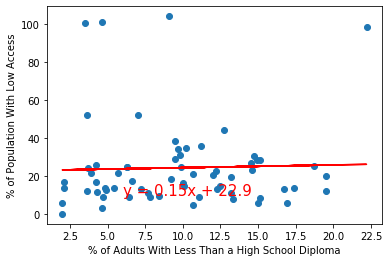

In [32]:
# Less Than High School
x_values =percent_less_than_hs 
y_values =percent_low_access
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('% of Adults With Less Than a High School Diploma') 
plt.ylabel('% of Population With Low Access')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('Adults With Less Than HS Diploma vs. % Population With Low Access.png')
plt.show()


The correlation between both factors is 0.33


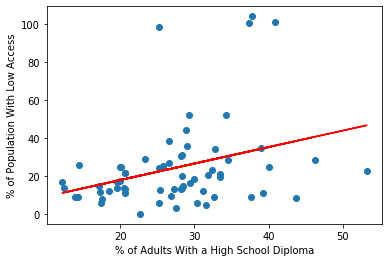

In [33]:
# High School
x_values =percent_hs
y_values =percent_low_access
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('% of Adults With a High School Diploma') 
plt.ylabel('% of Population With Low Access')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('Adults With HS Diploma vs. % Population With Low Access.png')
plt.show()


The correlation between both factors is 0.18


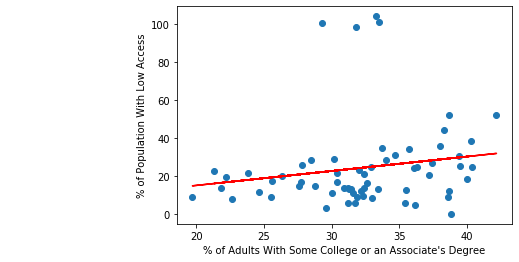

In [34]:
# Some Secondary Education
x_values =percent_some_secondary_education 
y_values =percent_low_access
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('% of Adults With Some College or an Associate\'s Degree') 
plt.ylabel('% of Population With Low Access')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('Adults With Some College or an Associate\'s Degree vs. % Population With Low Access.png')
plt.show()


The correlation between both factors is -0.28


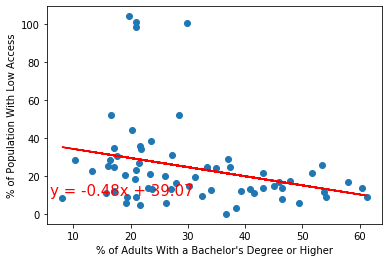

In [35]:
# Bachelor or Higher
x_values =percent_bachelor_or_higher 
y_values =percent_low_access
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('% of Adults With a Bachelor\'s Degree or Higher') 
plt.ylabel('% of Population With Low Access')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('Adults With a Bachelor\'s Degree or Higher vs. % Population With Low Access.png')
plt.show()


In [36]:
#<<<<<<<<<<<<<<   Median_Household_Income_2015   >>>>>>>>>>>>>>>>>>

In [37]:
# The next example will compute the Pearson correlation coefficient between "Median_Household_Income_2015" and "Percent_of_ population_with_low_access"
Median_Household_Income_2015 = CO_data.iloc[:,6]
Percent_of_population_with_low_access = CO_data.iloc[:,5]
correlation = st.pearsonr(Median_Household_Income_2015,Percent_of_population_with_low_access)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.3


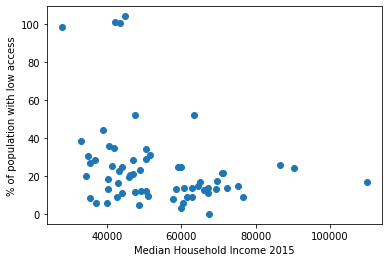

In [38]:
plt.scatter(Median_Household_Income_2015,Percent_of_population_with_low_access)
plt.xlabel('Median Household Income 2015')
plt.ylabel('% of population with low access')
#print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

The r-squared is: -0.30177018760170654


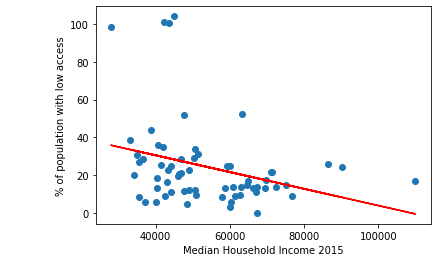

In [39]:
x_values = Median_Household_Income_2015 
y_values = Percent_of_population_with_low_access
#y_values = y_values/100
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Median Household Income 2015')
plt.ylabel('% of population with low access')
print(f"The r-squared is: {rvalue}")
plt.savefig('Median Household Income vs. % Population With Low Access.png')
plt.show()

In [40]:
#<<<<<<<<<<<<<<   Population Estimate 2015 >>>>>>>>>>>>>>>>>>

In [41]:
# Print CO Datafrme for reference in this part of code
#CO_data.head()

In [42]:
 # The next example will compute the Pearson correlation coefficient between "2015 Population Estimate" and "Percent_of_ population_with_low_access"
#Median_Household_Income_2015 = CO_data.iloc[:,6]
Population_Estimate_2015 = CO_data.iloc[:,3]
Percent_of_population_with_low_access = CO_data.iloc[:,5]
correlation = st.pearsonr(Population_Estimate_2015,Percent_of_population_with_low_access)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is -0.15


The correlation between both factors is -0.15


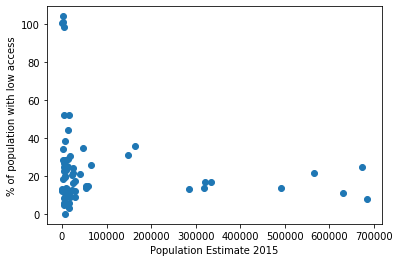

In [43]:
plt.scatter(Population_Estimate_2015,Percent_of_population_with_low_access)
plt.xlabel('Population Estimate 2015')
plt.ylabel('% of population with low access')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: -0.15293832149846026


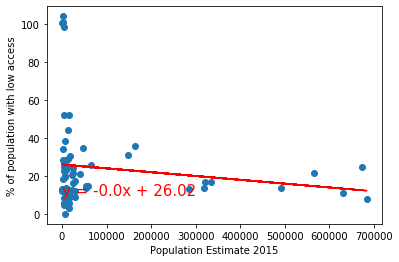

In [44]:
x_values = Population_Estimate_2015 
y_values = Percent_of_population_with_low_access
#y_values = y_values/100
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Population Estimate 2015')
plt.ylabel('% of population with low access')
print(f"The r-squared is: {rvalue}")
plt.savefig('Population Density vs. % Population With Low Access.png')
plt.show()


In [45]:
# Multivariate Regression
import statsmodels.api as sm

df = CO_data[["% of population with low access","2015 Population Estimate", "Median Household Income 2015", "% of adults with a bachelor's degree or higher, 2013-17"]]
df = df.rename(columns = {
    '% of population with low access' : 'access',
    '2015 Population Estimate' : 'population',
    'Median Household Income 2015' : 'income',
    "% of adults with a bachelor's degree or higher, 2013-17" : 'degree'
})

x = df[['population','income','degree']]
y = df['access']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 access   R-squared (uncentered):                   0.443
Model:                            OLS   Adj. R-squared (uncentered):              0.416
Method:                 Least Squares   F-statistic:                              16.17
Date:                Thu, 30 Jan 2020   Prob (F-statistic):                    7.58e-08
Time:                        19:39:09   Log-Likelihood:                         -296.23
No. Observations:                  64   AIC:                                      598.5
Df Residuals:                      61   BIC:                                      604.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
population -2.266e-05   1.94e-05     -1.166      0.248   -6.15e-05    1.62e-05
income         0.0006      0.000      3.002      0.004       0.000       0.001
degree        -0.3377      0.345     -0.979      0.331      -1.027       0.352
==============================================================================
Omnibus:                       41.876   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.546
Skew:                           2.131   Prob(JB):                     4.43e-24
Kurtosis:                       7.709   Cond. No.                     2.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""